<a href="https://colab.research.google.com/github/FelipeNascimentoDev/transfer-learning-cats-vs-dogs/blob/main/transfer_learning_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código inicial para instalar bibliotecas (se necessário) e importar módulos:

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import matplotlib.pyplot as plt

# Baixar e preparar o dataset:

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
import zipfile
import os

# URL do dataset
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Baixa o dataset
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False)

# Extrai o zip
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(path_to_zip))

# Define os caminhos corretos
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Criar geradores de imagens:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Carregar a rede pré-treinada (VGG16):

In [ ]:
from tensorflow.keras.applications import VGG16

# Carrega o modelo base (sem as camadas finais)
conv_base = VGG16(weights='imagenet',
                  include_top=False,  # remove as camadas de classificação padrão
                  input_shape=(150, 150, 3))

# Congela os pesos do modelo base (não vamos treiná-lo agora)
conv_base.trainable = False

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Passo 6 – Criar o modelo final:

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)  # base pré-treinada
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # saída binária

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Passo 7 – Compilar e Treinar:

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 imagens / batch_size=20
    epochs=10,
    validation_data=validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    validation_steps=50
)

Found 1000 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 761s 8s/step - accuracy: 0.6039 - loss: 0.6656 - val_accuracy: 0.8210 - val_loss: 0.4655
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 797s 8s/step - accuracy: 0.7801 - loss: 0.4718 - val_accuracy: 0.8560 - val_loss: 0.3791
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 765s 8s/step - accuracy: 0.8430 - loss: 0.3714 - val_accuracy: 0.8620 - val_loss: 0.3414
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 753s 8s/step - accuracy: 0.8693 - loss: 0.3357 - val_accuracy: 0.8710 - val_loss: 0.3174
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 802s 8s/step - accuracy: 0.8726 - loss: 0.3100 - val_accuracy: 0.8740 - val_loss: 0.3059
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 803s 8s/step - accuracy: 0.8951 - loss: 0.2772 - val_accuracy: 0.8720 - val_loss: 0.2939
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 798s 8s/step - accuracy: 0.8824 - loss: 0.2757 - val_accuracy: 0.8700 - val_loss: 0.2912
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 764s 8s/step - accuracy: 0.9070 - loss: 0.2446 - val_accuracy: 0.875

# Passo 8 – Visualizar resultados:

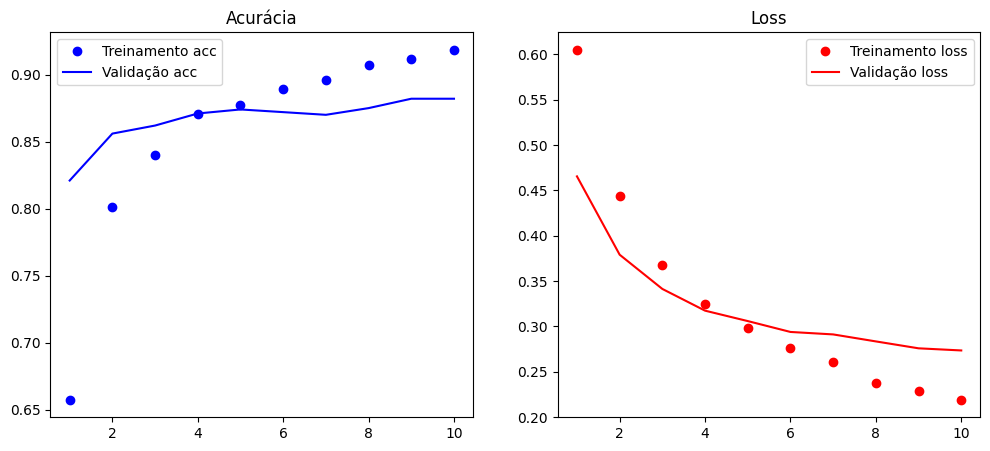

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Treinamento acc')
plt.plot(epochs, val_acc, 'b', label='Validação acc')
plt.title('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Treinamento loss')
plt.plot(epochs, val_loss, 'r', label='Validação loss')
plt.title('Loss')
plt.legend()

plt.show()

# Passo 9 – Salvar o modelo:

In [ ]:
model.save('cats_vs_dogs_vgg16.keras')